In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import missingno as msno
%matplotlib inline

In [22]:
df_train = pd.read_csv('/Users/mac/Desktop/advance-data-science/Lesson-2/ADS-Module-2-Manchine-learning-algorithms-and-techniques/S2/titanic/titanic_train.csv')

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [24]:
df_train.describe()

/Users/mac/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#Checking for missing values
df_train.isnull().values.any()

True

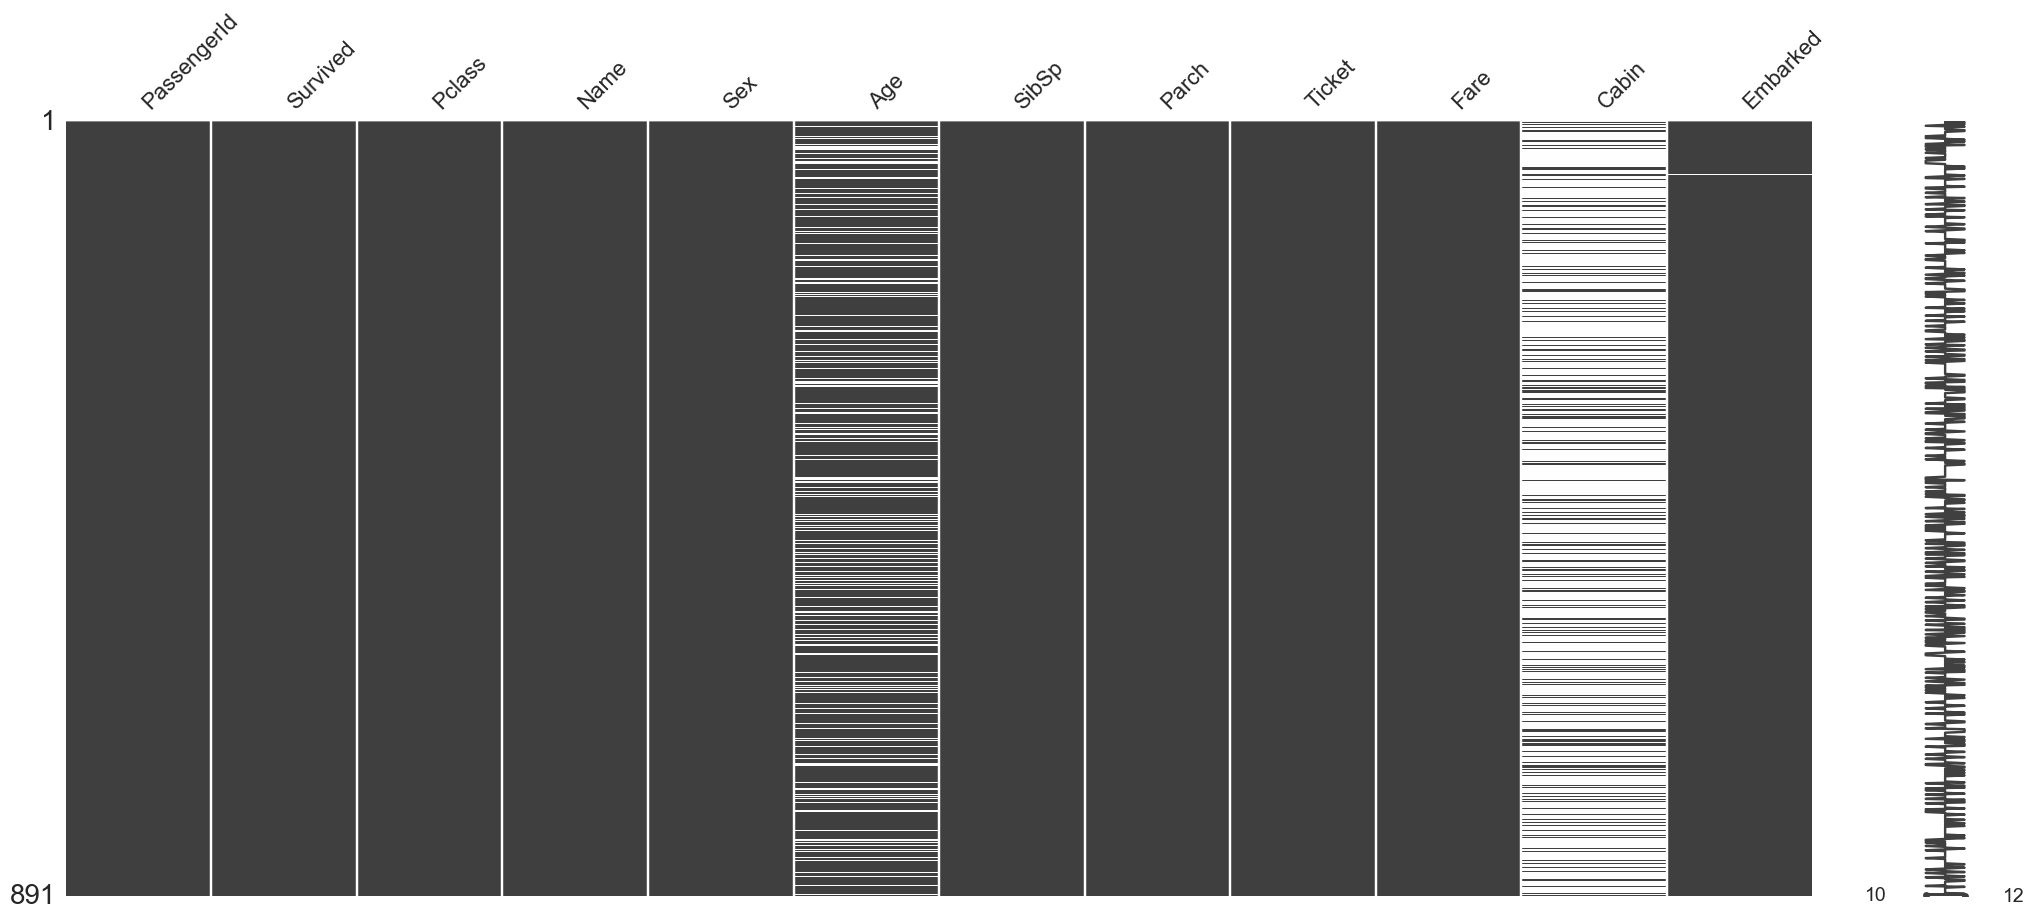

In [26]:
#Checking where the missing data is
msno.matrix(df_train)

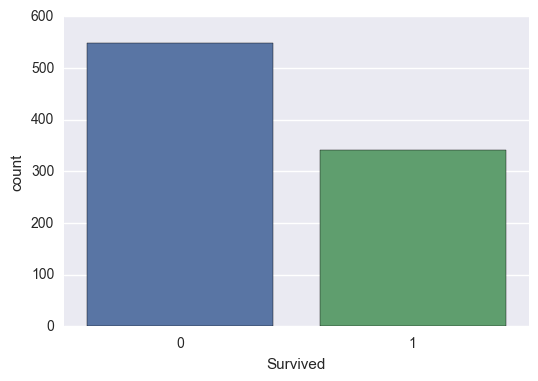

In [27]:
#Count how many people survived 
ax = sns.countplot(x="Survived", data=df_train)

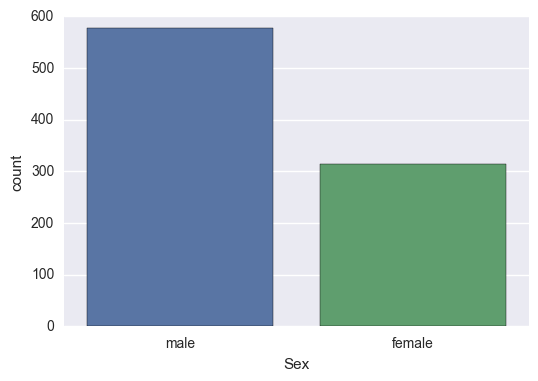

In [28]:
#Count the distribution of passengers amongst classes on board 
ax = sns.countplot(x="Sex", data=df_train)

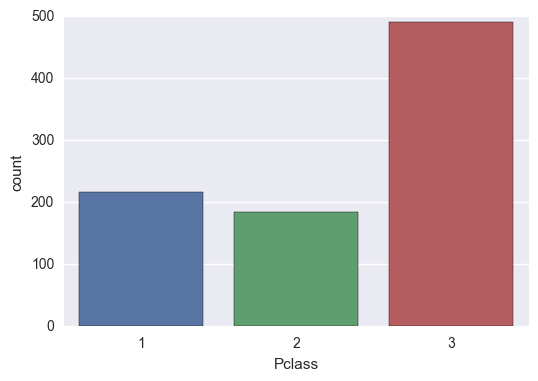

In [29]:
#Count the distribution of passengers amongst classes on board 
ax = sns.countplot(x="Pclass", data=df_train)

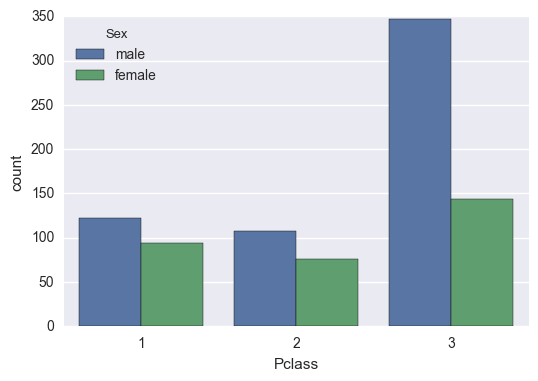

In [30]:
ax = sns.countplot(x="Pclass", hue="Sex", data=df_train)

In [31]:
#range = (np.nanmin(df['Age']), np.nanmax(df['Age']))
# plt.hist passes it's arguments to np.histogram
#plt.hist(df['Age'], bins='auto', range =(np.nanmin(df['Age']), np.nanmax(df['Age'])))  
#plt.title("Histogram with 'auto' bins")
#plt.show()

In [32]:
def impute_age(age, Pclass):
   out = np.array(age)
   length = len(out)
   for i in range (0,length):
       if (np.isnan(out[i])):
           if (Pclass[i] == 1):
               out[i] = 37
           elif (Pclass[i] == 2):
               out[i] = 29
           else:
               out[i] = 24
       else:
           out[i]=age[i]
   return(out)

In [33]:
fixed_ages= impute_age(df_train['Age'], df_train['Pclass'])

In [34]:
df_train['Age'] = fixed_ages

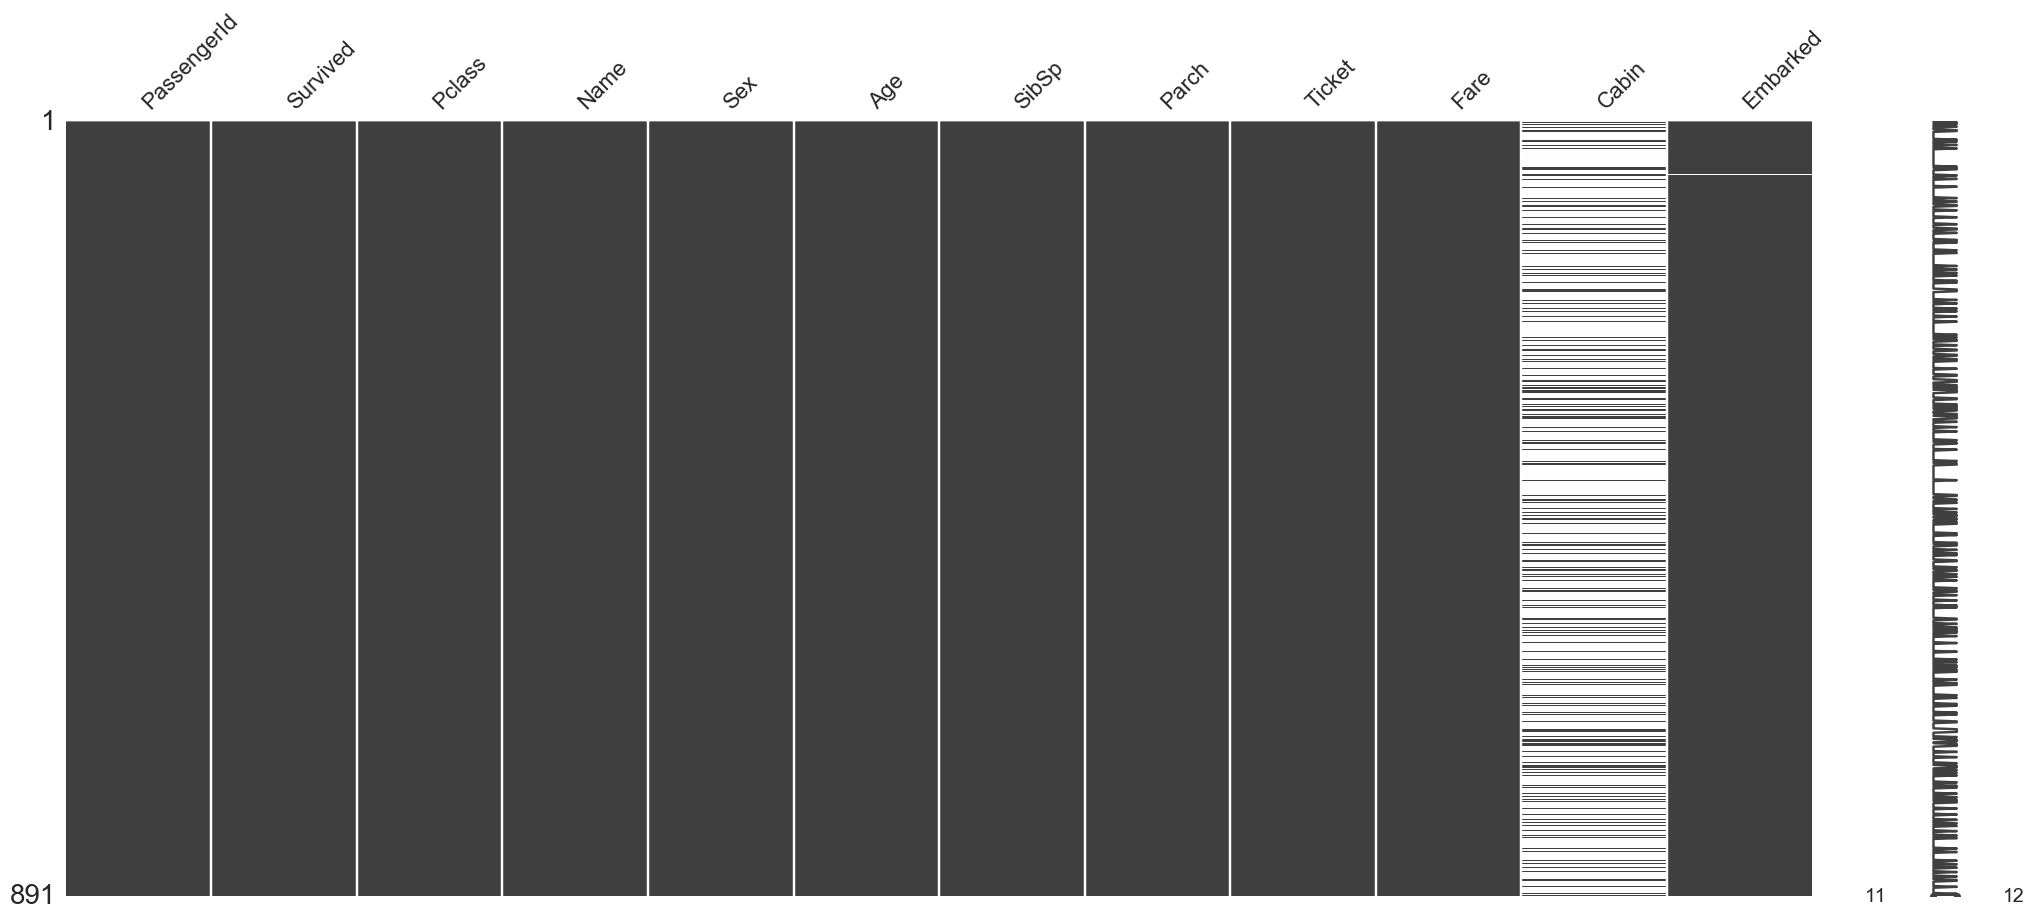

In [35]:
#Checking where the missing data is
msno.matrix(df)

## Building a Logistic Regression Model

In [36]:
sklearn.linear_model.LogisticRegression(df_train)

AttributeError: module 'sklearn' has no attribute 'linear_model'